In [1]:
import cartopy
import xarray as xr
import cf_xarray
import numpy as np
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt

In [2]:
xr.set_options(keep_attrs=True)
ds = xr.open_dataset('https://data.pmel.noaa.gov/aclim/thredds/dodsC/B10K-K20_Level2_CORECFS_integrated_collection.nc')
ds

<xarray.Dataset> Size: 12GB
Dimensions:     (ocean_time: 2837, eta_rho: 258, xi_rho: 182)
Coordinates:
    lat_rho     (eta_rho, xi_rho) float64 376kB ...
    lon_rho     (eta_rho, xi_rho) float64 376kB ...
  * ocean_time  (ocean_time) datetime64[ns] 23kB 1970-01-18T12:00:00 ... 2024...
Dimensions without coordinates: eta_rho, xi_rho
Data variables: (12/25)
    Cs_r        float64 8B ...
    hc          float64 8B ...
    s_rho       float64 8B ...
    Cop         (ocean_time, eta_rho, xi_rho) float32 533MB ...
    zeta        (ocean_time, eta_rho, xi_rho) float32 533MB ...
    EupO        (ocean_time, eta_rho, xi_rho) float32 533MB ...
    ...          ...
    prod_MZL    (ocean_time, eta_rho, xi_rho) float32 533MB ...
    prod_NCaO   (ocean_time, eta_rho, xi_rho) float32 533MB ...
    prod_NCaS   (ocean_time, eta_rho, xi_rho) float32 533MB ...
    prod_PhL    (ocean_time, eta_rho, xi_rho) float32 533MB ...
    prod_PhS    (ocean_time, eta_rho, xi_rho) float32 533MB ...
    temp        (ocean_time, eta_rho, xi_rho) float32 533MB ...
Attributes: (12/45)
    file:                       ../../bering10k/output/hindcasts/npz_201904_d...
    format:                     netCDF-3 classic file
    Conventions:                CF-1.0
    type:                       ROMS/TOMS averages file
    title:                      B10K_K20_CORECFS Level 2 Integrated
    var_info:                   /gscratch/bumblereem/bering10k/input/var/vari...
    ...                         ...
    ana_file:                   ROMS/Functionals/ana_btflux.h, /gscratch/bumb...
    bio_file:                   ROMS/Nonlinear/bestnpz.h
    CPP_options:                NEP5, ADD_FSOBC, ADD_M2OBC, ANA_BIOLOGY, ANA_...
    NCO:                        4.6.9
    history_of_appended_files:  Fri Oct  9 22:09:25 2020: Appended file /gscr...
    nco_openmp_thread_number:   1

In [33]:
temp_slice = ds['temp'].cf.sel(time='1970-02-01')
time_stamp = temp_slice.cf['time'].values[0]
temp_slice

<xarray.DataArray 'temp' (ocean_time: 1, eta_rho: 258, xi_rho: 182)> Size: 188kB
[46956 values with dtype=float32]
Coordinates:
    lat_rho     (eta_rho, xi_rho) float64 376kB 45.0 45.09 45.18 ... 69.56 69.66
    lon_rho     (eta_rho, xi_rho) float64 376kB 197.2 197.3 ... 156.5 156.4
  * ocean_time  (ocean_time) datetime64[ns] 8B 1970-02-01T12:00:00
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:     time-averaged potential temperature, integrated over depth
    units:         (Celsius)*m
    time:          ocean_time
    field:         temperature, scalar, series
    cell_methods:  s_rho: mean

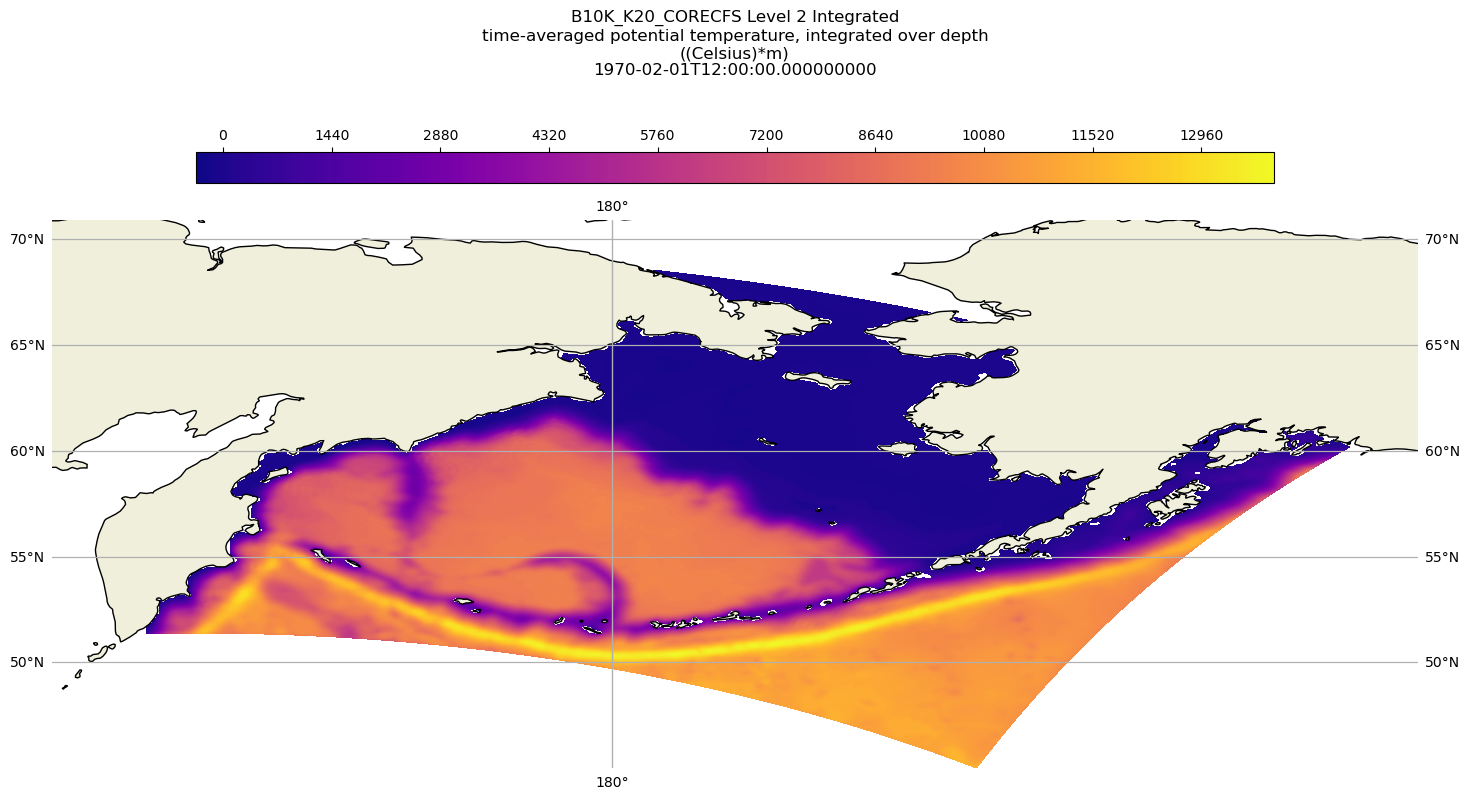

In [34]:
aspect = (temp_slice.cf['longitude'].max()-temp_slice.cf['longitude'].min())/(temp_slice.cf['latitude'].max()-temp_slice.cf['latitude'].cf.min())
plt.figure(figsize=(8*aspect,8), frameon=False)
proj = ccrs.PlateCarree(central_longitude=180)
proj180 = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
# add some features to make the map a little more polished
ax.add_feature(cartopy.feature.LAND)
ax.coastlines('50m')
gl = ax.gridlines(draw_labels=True)
gl = ax.gridlines()
ct = ax.contourf(temp_slice.cf['longitude'], temp_slice.cf['latitude'], temp_slice[0, :, :], levels=255, transform=proj180, cmap='plasma')
plt.colorbar(ct, orientation='horizontal',pad=0.06, location='top', aspect=35, fraction=.05)
plt.title(ds.title + '\n' + ds['temp'].attrs['long_name'] +'\n(' + ds['temp'].attrs['units'] + ')\n' + str(time_stamp), y=1.25)
xy_pixels = ax.transData.transform([(180, -90), (-180, 90)])
ax.set_axis_off()
plt.show()